In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


%matplotlib inline

In [2]:
Retail_df = pd.read_excel('C:\\Users\\subhr\\Desktop\\Capstone_Project\\Project 3\\Online Retail.xlsx')

In [3]:
Retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<h2> Data Wrangling

In [4]:
#checking for null values

(Retail_df.isnull().sum()/Retail_df.shape[0]).round(3)*100

InvoiceNo       0.0
StockCode       0.0
Description     0.3
Quantity        0.0
InvoiceDate     0.0
UnitPrice       0.0
CustomerID     24.9
Country         0.0
dtype: float64

In [5]:
#Dropping the rows with null Description values

Retail_df.dropna(axis=0,inplace=True,subset=['Description'])

In [6]:
Retail_df['Description'].isnull().sum()

0

In [7]:
Retail_df.groupby('Description')[['UnitPrice','Quantity']].sum()

,UnitPrice,Quantity
Description,,
20713,0.00,-400
4 PURPLE FLOCK DINNER CANDLES,100.67,144
50'S CHRISTMAS GIFT BAG LARGE,185.28,1913
DOLLY GIRL BEAKER,271.38,2448
I LOVE LONDON MINI BACKPACK,405.80,389
...,...,...
wrongly marked carton 22804,0.00,-256
wrongly marked. 23343 in box,0.00,-3100
wrongly sold (22719) barcode,0.00,170


In [8]:
#Dropping rows with 0 unit price

Retail_df.drop(index = Retail_df[Retail_df['UnitPrice']==0.0].index,inplace=True)

In [9]:
Retail_df[Retail_df['UnitPrice']==0.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [10]:
#Calculating total price of each purchased item by multiplying Quantity with Unit price

Retail_df['TotalPrice'] = Retail_df['Quantity'] * Retail_df['UnitPrice']

In [11]:
# commented code used to save refined retail data for visualization in Tableau

#Retail_tab_df = Retail_df.drop(['UnitPrice','CustomerID','Country'],axis=1)
#Retail_tab_df.to_excel('C:\\Users\\subhr\\Desktop\\Capstone_Project\\Retail_tab.xlsx')

In [12]:
#grouping based on InvoiceNo','InvoiceDate','CustomerID','Country' and sum of TotalPrice per InvoiceNo

Retail_df.groupby(['InvoiceNo','InvoiceDate','CustomerID','Country'],dropna=False)['TotalPrice'].sum()

InvoiceNo  InvoiceDate          CustomerID  Country       
536365     2010-12-01 08:26:00  17850.0     United Kingdom       139.12
536366     2010-12-01 08:28:00  17850.0     United Kingdom        22.20
536367     2010-12-01 08:34:00  13047.0     United Kingdom       278.73
536368     2010-12-01 08:34:00  13047.0     United Kingdom        70.05
536369     2010-12-01 08:35:00  13047.0     United Kingdom        17.85
                                                                ...    
C581484    2011-12-09 09:27:00  16446.0     United Kingdom   -168469.60
C581490    2011-12-09 09:57:00  14397.0     United Kingdom       -32.53
C581499    2011-12-09 10:28:00  15498.0     United Kingdom      -224.69
C581568    2011-12-09 11:57:00  15311.0     United Kingdom       -54.75
C581569    2011-12-09 11:58:00  17315.0     United Kingdom        -7.50
Name: TotalPrice, Length: 23841, dtype: float64

In [13]:
#Creating a new DataFrame with the above grouping

Retail_new_df = pd.DataFrame(data = Retail_df.groupby(['InvoiceNo','InvoiceDate','CustomerID','Country'],dropna=False)['TotalPrice'].sum())

In [14]:
Retail_new_df = Retail_new_df.reset_index()

In [15]:
#Renaming TotalPrice columns as TotalBillAmt in the new DataFrame

Retail_new_df.rename(columns={"TotalPrice": "TotalBillAmt"},inplace = True)

In [16]:
Retail_new_df.columns

Index(['InvoiceNo', 'InvoiceDate', 'CustomerID', 'Country', 'TotalBillAmt'], dtype='object')

In [17]:
#Checking for null values in the new DataFrame

Retail_new_df.isnull().sum()

InvoiceNo          0
InvoiceDate        0
CustomerID      1624
Country            0
TotalBillAmt       0
dtype: int64

In [18]:
Retail_new_df[Retail_new_df['CustomerID'].isnull()]

,InvoiceNo,InvoiceDate,CustomerID,Country,TotalBillAmt
83,536544,2010-12-01 14:32:00,NaN,United Kingdom,5521.14
85,536555,2010-12-01 14:37:00,NaN,United Kingdom,2.97
88,536558,2010-12-01 14:48:00,NaN,United Kingdom,99.75
95,536565,2010-12-01 15:15:00,NaN,United Kingdom,6.70
122,536592,2010-12-01 17:06:00,NaN,United Kingdom,6915.65
...,...,...,...,...,...
23602,C578097,2011-11-22 17:31:00,NaN,United Kingdom,-1208.04
23670,C579757,2011-11-30 14:56:00,NaN,United Kingdom,-15.60
23710,C579907,2011-12-01 08:48:00,NaN,EIRE,-15.30
23757,C580604,2011-12-05 11:35:00,NaN,United Kingdom,-11586.50


<h3>Filling up the null values in CustomerID column with different customer ids for different invoice number by incrementing the last customer id by 1 in every iteration

In [19]:
len = Retail_new_df.shape[0]
l = 0.0
for i in np.arange(len):
    k= i+1
    if Retail_new_df['CustomerID'][i:k].isnull().bool():
        num = l + 18288.0
        Retail_new_df['CustomerID'][i:k].replace(np.nan,num,inplace=True)  
        l = l+1
    else:
        continue    

In [20]:
#Retail_new_df.to_excel('C:\\Users\\subhr\\Desktop\\Capstone_Project\\Refined_Retail.xlsx')

In [21]:
Retail_new_df[Retail_new_df['CustomerID']>18287].head()

,InvoiceNo,InvoiceDate,CustomerID,Country,TotalBillAmt
83,536544,2010-12-01 14:32:00,18288.0,United Kingdom,5521.14
85,536555,2010-12-01 14:37:00,18289.0,United Kingdom,2.97
88,536558,2010-12-01 14:48:00,18290.0,United Kingdom,99.75
95,536565,2010-12-01 15:15:00,18291.0,United Kingdom,6.70
122,536592,2010-12-01 17:06:00,18292.0,United Kingdom,6915.65


In [22]:
#Checking for null values if any after Data Wrangling 

Retail_new_df.isnull().sum()

InvoiceNo       0
InvoiceDate     0
CustomerID      0
Country         0
TotalBillAmt    0
dtype: int64

<h2> Descriptive Analysis

In [23]:
Retail_new_df['TotalBillAmt'].agg(['min','max','mean','var','std'])

min    -1.684696e+05
max     1.684696e+05
mean    4.088649e+02
var     4.380228e+06
std     2.092899e+03
Name: TotalBillAmt, dtype: float64

In [24]:
Retail_new_df['InvoiceDate'] = pd.to_datetime(Retail_new_df['InvoiceDate'])

In [25]:
Retail_new_df['InvoiceDt'] = Retail_new_df['InvoiceDate'].dt.date
Retail_new_df['InvoiceTime'] = Retail_new_df['InvoiceDate'].dt.time
Retail_new_df['InvoiceMonth'] = Retail_new_df['InvoiceDate'].dt.month
Retail_new_df['InvoiceYear'] = Retail_new_df['InvoiceDate'].dt.year

In [26]:
Retail_new_df.head()

,InvoiceNo,InvoiceDate,CustomerID,Country,TotalBillAmt,InvoiceDt,InvoiceTime,InvoiceMonth,InvoiceYear
0,536365,2010-12-01 08:26:00,17850.0,United Kingdom,139.12,2010-12-01,08:26:00,12,2010
1,536366,2010-12-01 08:28:00,17850.0,United Kingdom,22.20,2010-12-01,08:28:00,12,2010
2,536367,2010-12-01 08:34:00,13047.0,United Kingdom,278.73,2010-12-01,08:34:00,12,2010
3,536368,2010-12-01 08:34:00,13047.0,United Kingdom,70.05,2010-12-01,08:34:00,12,2010
4,536369,2010-12-01 08:35:00,13047.0,United Kingdom,17.85,2010-12-01,08:35:00,12,2010


<h2> Cohort Analysis

In [27]:
#Month Cohort

cohort_df = pd.DataFrame(data= Retail_new_df.groupby(['InvoiceMonth','InvoiceYear','InvoiceDt'])[['CustomerID','TotalBillAmt']].agg({'CustomerID':'count','TotalBillAmt': 'sum'}))

In [28]:
cohort_df

CustomerID  TotalBillAmt
InvoiceMonth InvoiceYear InvoiceDt                           
1            2011        2011-01-04          43      14950.48
                         2011-01-05          73      -1566.23
                         2011-01-06          76      37392.74
                         2011-01-07          58      27233.14
                         2011-01-09          51      15710.80
...                                         ...           ...
12           2011        2011-12-05         143      57751.32
                         2011-12-06         146      54228.37
                         2011-12-07         119      75076.22
                         2011-12-08         140      81417.78
                         2011-12-09          49      32131.53

[305 rows x 2 columns]

In [29]:
cohort_df=cohort_df.reset_index()

In [30]:
cohort_df.rename(columns={'CustomerID':'Customer(count)'},inplace=True)

In [31]:
cohort_df.groupby(['InvoiceMonth','InvoiceYear'])[['InvoiceDt','Customer(count)']].agg({'InvoiceDt':'count','Customer(count)':'sum'})

,,InvoiceDt,Customer(count)
InvoiceMonth,InvoiceYear,,
1,2011,24,1353
2,2011,24,1327
3,2011,27,1779
4,2011,21,1492
5,2011,25,2000
6,2011,26,1863
7,2011,26,1746
8,2011,26,1643
9,2011,26,2171


<h3> Conclusion : Going by the day count per month and customer count per month its evident that there is certain percentage increase in the numbers of customers over the months

<h2> RFM Analysis

In [32]:
#Recency

Retail_new_df['Recency'] = Retail_new_df['InvoiceDt'].max() - Retail_new_df['InvoiceDt']

In [33]:
Retail_new_df['Recency'] = Retail_new_df['Recency'].dt.days

In [34]:
Retail_new_df.head()

,InvoiceNo,InvoiceDate,CustomerID,Country,TotalBillAmt,InvoiceDt,InvoiceTime,InvoiceMonth,InvoiceYear,Recency
0,536365,2010-12-01 08:26:00,17850.0,United Kingdom,139.12,2010-12-01,08:26:00,12,2010,373
1,536366,2010-12-01 08:28:00,17850.0,United Kingdom,22.20,2010-12-01,08:28:00,12,2010,373
2,536367,2010-12-01 08:34:00,13047.0,United Kingdom,278.73,2010-12-01,08:34:00,12,2010,373
3,536368,2010-12-01 08:34:00,13047.0,United Kingdom,70.05,2010-12-01,08:34:00,12,2010,373
4,536369,2010-12-01 08:35:00,13047.0,United Kingdom,17.85,2010-12-01,08:35:00,12,2010,373


In [35]:
#Monetary and Frequency

Retail_new_df.groupby(['CustomerID'])[['TotalBillAmt','InvoiceDate','Recency']].agg({'TotalBillAmt':'sum','InvoiceDate':'count','Recency':'min'})

,TotalBillAmt,InvoiceDate,Recency
CustomerID,,,
12346.0,0.00,2,325
12347.0,4310.00,7,2
12348.0,1797.24,4,75
12349.0,1757.55,1,18
12350.0,334.40,1,310
...,...,...,...
19907.0,-1208.04,1,17
19908.0,-15.60,1,9
19909.0,-15.30,1,8


In [36]:
#Creating new DataFrame for RFM analysis

rfm_model_df = pd.DataFrame(data = Retail_new_df.groupby(['CustomerID'])[['TotalBillAmt','InvoiceDate','Recency']].agg({'TotalBillAmt':'sum','InvoiceDate':'count','Recency':'min'}))

In [37]:
 rfm_model_df = rfm_model_df.reset_index()

In [38]:
rfm_model_df.rename(columns={'TotalBillAmt':'Monetary','InvoiceDate':'Frequency(count)','Recency':'Recency(days)'},inplace= True)

In [39]:
rfm_model_df.head()

,CustomerID,Monetary,Frequency(count),Recency(days)
0,12346.0,0.00,2,325
1,12347.0,4310.00,7,2
2,12348.0,1797.24,4,75
3,12349.0,1757.55,1,18
4,12350.0,334.40,1,310


<h3> Calculating RFM metrics ,RFM score and creating RFM segments

In [40]:
rfm_model_df['M_score'] = pd.qcut(rfm_model_df['Monetary'],q=[0,.25,.5,.75,1],labels= [1,2,3,4]).astype('int')
rfm_model_df['R_score'] = pd.qcut(rfm_model_df['Recency(days)'],q=[0,.25,.5,.75,1],labels= [4,3,2,1]).astype('int')

In [41]:
rfm_model_df.head()

,CustomerID,Monetary,Frequency(count),Recency(days),M_score,R_score
0,12346.0,0.00,2,325,1,1
1,12347.0,4310.00,7,2,4,4
2,12348.0,1797.24,4,75,4,2
3,12349.0,1757.55,1,18,4,4
4,12350.0,334.40,1,310,2,1


In [42]:
Ct1 = rfm_model_df[rfm_model_df['Frequency(count)']<=2].shape[0]/rfm_model_df.shape[0]

In [43]:
rfm_model_df['F_score'] = pd.qcut(rfm_model_df['Frequency(count)'],q=[0,Ct1,.8,1],labels= [1,2,3]).astype('int')

In [44]:
rfm_model_df['RFM_score'] = rfm_model_df['R_score']+rfm_model_df['F_score']+rfm_model_df['M_score']

In [45]:
rfm_model_df['Customer_Value'] = pd.qcut(rfm_model_df['RFM_score'],q=[0,.25,.5,.75,1],labels=['very low','low','medium','high'])

In [46]:
rfm_model_df.to_excel(('C:\\Users\\subhr\\Desktop\\Capstone_Project\\RFM.xlsx'))

<h2> K-MEANS Clustering and Elbow method 

In [47]:
X= rfm_model_df[['Monetary','Frequency(count)','Recency(days)','M_score','R_score','F_score','RFM_score']]

<AxesSubplot:xlabel='RFM_score', ylabel='Count'>

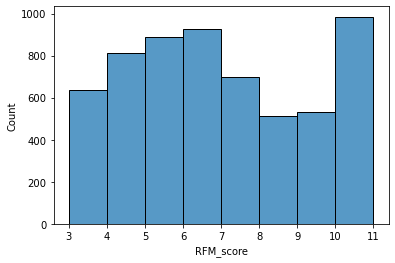

In [48]:
#Distribution of RFM score

sns.histplot(X,x='RFM_score',bins=8)

In [49]:
#Initialisation of StandardScaler to standardize the dataset before applying k-means clustering algorithm

ss = StandardScaler()

In [50]:
X_final = ss.fit_transform(X)

In [51]:
X_final

array([[-0.22607292, -0.24135346,  1.832011  , ..., -1.34551452,
        -0.71128961, -1.44937489],
       [ 0.37318077,  0.36910726, -1.03851214, ...,  1.318702  ,
         1.84901133,  1.79793987],
       [ 0.02381169,  0.00283083, -0.38975614, ..., -0.45744235,
         0.56886086,  0.58019684],
       ...,
       [-0.22820021, -0.3634456 , -0.98518973, ...,  1.318702  ,
        -0.71128961, -0.23163186],
       [-1.83703648, -0.3634456 , -1.02073801, ...,  1.318702  ,
        -0.71128961, -0.23163186],
       [-2.70601829, -0.3634456 , -1.02073801, ...,  1.318702  ,
        -0.71128961, -0.23163186]])

<h3> Elbow Method

In [52]:
wcss = list()

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(X_final)
    wcss.append(kmeans.inertia_)

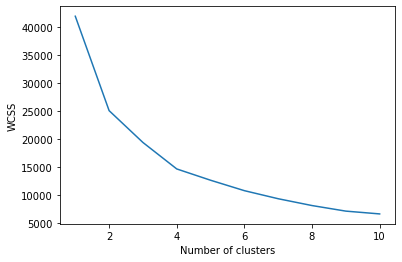

In [53]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

<h3> Conclusion : As its clear from the graph that within cluster sum of squares(wcss) starts flattening when the number of clusters are 4 . Hereby it becomes apparent that 4 number of clusters must be taken into account.

<h3> K-means Clustering with n_clusters=4

In [54]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(X_final)

KMeans(n_clusters=4, random_state=0)

In [55]:
kmeans.labels_

array([1, 0, 2, ..., 2, 2, 2])

In [56]:
rfm_model_df['Clusters'] = kmeans.labels_

In [57]:
rfm_model_df

,CustomerID,Monetary,Frequency(count),Recency(days),M_score,R_score,F_score,RFM_score,Customer_Value,Clusters
0,12346.0,0.00,2,325,1,1,1,3,very low,1
1,12347.0,4310.00,7,2,4,4,3,11,high,0
2,12348.0,1797.24,4,75,4,2,2,8,medium,2
3,12349.0,1757.55,1,18,4,4,1,9,medium,2
4,12350.0,334.40,1,310,2,1,1,4,very low,1
...,...,...,...,...,...,...,...,...,...,...
5990,19907.0,-1208.04,1,17,1,4,1,6,low,2
5991,19908.0,-15.60,1,9,1,4,1,6,low,2
5992,19909.0,-15.30,1,8,1,4,1,6,low,2
5993,19910.0,-11586.50,1,4,1,4,1,6,low,2


In [58]:
#Cluster 1

rfm_model_df[rfm_model_df['Clusters']==0]

,CustomerID,Monetary,Frequency(count),Recency(days),M_score,R_score,F_score,RFM_score,Customer_Value,Clusters
1,12347.0,4310.00,7,2,4,4,3,11,high,0
5,12352.0,1545.41,11,36,3,3,3,9,medium,0
9,12356.0,2811.43,3,22,4,4,2,10,high,0
12,12359.0,6245.53,6,7,4,4,3,11,high,0
13,12360.0,2662.06,3,52,4,3,2,9,medium,0
...,...,...,...,...,...,...,...,...,...,...
4360,18272.0,3064.78,7,2,4,4,3,11,high,0
4369,18283.0,2094.88,16,3,4,4,3,11,high,0
4370,18287.0,1837.28,3,42,4,3,2,9,medium,0
5673,19590.0,52940.94,1,32,4,3,1,8,medium,0


In [59]:
#Cluster 2

rfm_model_df[rfm_model_df['Clusters']==1]

,CustomerID,Monetary,Frequency(count),Recency(days),M_score,R_score,F_score,RFM_score,Customer_Value,Clusters
0,12346.0,0.00,2,325,1,1,1,3,very low,1
4,12350.0,334.40,1,310,2,1,1,4,very low,1
6,12353.0,89.00,1,204,1,2,1,4,very low,1
7,12354.0,1079.40,1,232,3,1,1,5,very low,1
8,12355.0,459.40,1,214,2,1,1,4,very low,1
...,...,...,...,...,...,...,...,...,...,...
5946,19863.0,-366.27,1,84,1,2,1,4,very low,1
5947,19864.0,-2653.95,1,81,1,2,1,4,very low,1
5948,19865.0,-232.57,1,80,1,2,1,4,very low,1
5949,19866.0,-42.70,1,80,1,2,1,4,very low,1


In [60]:
#Cluster 3

rfm_model_df[rfm_model_df['Clusters']==2]

,CustomerID,Monetary,Frequency(count),Recency(days),M_score,R_score,F_score,RFM_score,Customer_Value,Clusters
2,12348.0,1797.24,4,75,4,2,2,8,medium,2
3,12349.0,1757.55,1,18,4,4,1,9,medium,2
10,12357.0,6207.67,1,33,4,3,1,8,medium,2
11,12358.0,1168.06,2,1,3,4,1,8,medium,2
16,12363.0,552.00,2,109,2,2,1,5,very low,2
...,...,...,...,...,...,...,...,...,...,...
5990,19907.0,-1208.04,1,17,1,4,1,6,low,2
5991,19908.0,-15.60,1,9,1,4,1,6,low,2
5992,19909.0,-15.30,1,8,1,4,1,6,low,2
5993,19910.0,-11586.50,1,4,1,4,1,6,low,2


In [61]:
#Cluster 4

rfm_model_df[rfm_model_df['Clusters']==3]

,CustomerID,Monetary,Frequency(count),Recency(days),M_score,R_score,F_score,RFM_score,Customer_Value,Clusters
55,12415.0,123725.45,26,24,4,3,3,10,high,3
330,12748.0,29072.10,224,0,4,4,3,11,high,3
568,13089.0,57385.88,118,2,4,4,3,11,high,3
1004,13694.0,62653.10,60,3,4,4,3,11,high,3
1344,14156.0,113384.14,66,9,4,4,3,11,high,3
1673,14606.0,11713.85,130,1,4,4,3,11,high,3
1702,14646.0,279489.02,76,1,4,4,3,11,high,3
1894,14911.0,132572.62,249,1,4,4,3,11,high,3
2191,15311.0,59419.34,118,0,4,4,3,11,high,3
2721,16029.0,50992.61,76,38,4,3,3,10,high,3


<h3> Analysis : There are four clusters created where the clusters seems to be slightly overlapping each other 

<h2> Tableau Retail Analysis Dashboard

In [62]:
img = mpimg.imread('C:\\Users\\subhr\\Desktop\\Capstone_Project\\Retail_Analysis_Dashboard.png')

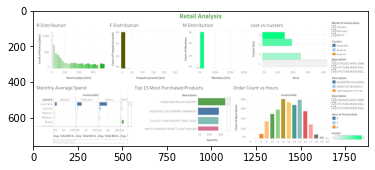

In [63]:
plt.imshow(img)